In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import check_grad
from sklearn.datasets import make_classification

#Read the csv data
data = pd.read_csv('ex2data1.csv',sep=',')
print(data.shape)
data.head()


(100, 3)


,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
x_data = data.iloc[:,:-1]#initial 2 columns


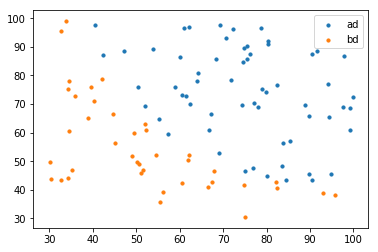

In [41]:
y_data = data.iloc[:,-1] #last column


ad = data.loc[y_data == 1]
bd = data.loc[y_data == 0]

plt.scatter(ad.iloc[:, 0], ad.iloc[:, 1], s=10, label='ad')
plt.scatter(bd.iloc[:, 0], bd.iloc[:, 1], s=10, label='bd')
plt.legend()
plt.show()

In [85]:
lr = 0.01
num_iter = 100000
def add_intercept(x_data):
    intercept = np.ones((x_data.shape[0], 1))
    return np.concatenate((intercept, x_data), axis=1)

In [86]:
X = add_intercept(x_data)


In [87]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [88]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [89]:

def gradient_descent(X, y_data):   
    # weights initialization
    theta = np.zeros(X.shape[1])
    descent = dict()
        
    for i in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y_data)) / y_data.size
        theta -= lr * gradient
            
        z = np.dot(X,theta)
        h = sigmoid(z)
        loss = cost(h, y_data)
                
        if i % 10000 == 0:
            # Add something here to capture the 10 costs so that I can plot it against # of iterations
            descent[i] = loss
            print(f'cost: {loss} \t', f'weights: {theta} \t')
    return theta

In [90]:
weights= gradient_descent(X,y_data)


cost: 4.960600143358933 	 weights: [0.001      0.12009217 0.11262842] 	


/home/ubuntu-eng-01/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


cost: 7.058003348364873 	 weights: [-7.66288512  0.20608697 -0.26216035] 	
cost: inf 	 weights: [-15.15245113   0.66056464   0.24510133] 	
cost: 2.6985950710978126 	 weights: [-22.27481465   0.42581515   0.11761326] 	
cost: 2.4977806978893846 	 weights: [-28.888631     0.27383155   0.06363836] 	
cost: inf 	 weights: [-34.98142694   0.69523128   0.47707071] 	
cost: 1.1484951273415296 	 weights: [-39.67118957   0.28876484   0.25156869] 	
cost: 5.9450855340545745 	 weights: [-42.25125223   0.52178815   0.48085137] 	
cost: 0.5408703268648108 	 weights: [-44.14938087   0.34795234   0.30315416] 	
cost: 0.6650623056947012 	 weights: [-46.42794462   0.37131414   0.30466863] 	


In [105]:
print(weights)
x_values = [np.min(x_data.iloc[:, 0]-10 ), np.max(x_data.iloc[:, 1] +10)]
y_values = - (weights[0] + np.dot(weights[1], x_values)) / weights[2]



[-48.86134447   0.57769372   0.48293217]


In [106]:

print(x_values)

[20.05882244669796, 108.86943574220612]


In [107]:
print(y_values)

[ 77.18162351 -29.05551985]


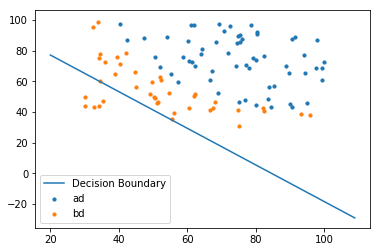

In [109]:

plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(ad.iloc[:, 0], ad.iloc[:, 1], s=10, label='ad')
plt.scatter(bd.iloc[:, 0], bd.iloc[:, 1], s=10, label='bd')

plt.legend()
plt.show()